In [1]:
import xarray as xr

In [37]:
file = '/glade/work/jpan/CMORPH/www.ncei.noaa.gov/data/cmorph-high-resolution-global-precipitation-estimates/access/30min/8km/2018/01/01/CMORPH_V1.0_ADJ_8km-30min_2018010101.nc'
file = '/glade/work/jpan/IMERG/gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/2018/030/3B-HHR.MS.MRG.3IMERG.20180130-S020000-E022959.0120.V07B.HDF5'
file = '/glade/work/jpan/IMERG/gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/2018/052/3B-HHR.MS.MRG.3IMERG.20180221-S210000-E212959.1260.V07B.HDF5'

In [38]:
ds = xr.open_dataset(file, group='/Grid', engine='h5netcdf')
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360

In [39]:
ds

<xarray.Dataset> Size: 104MB
Dimensions:                         (time: 1, lat: 1800, nv: 2, lon: 3600,
                                     lonv: 2, latv: 2)
Coordinates:
  * time                            (time) object 8B 2018-02-21 21:00:00
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
  * lon                             (lon) float32 14kB 0.05 0.15 ... 359.8 360.0
Dimensions without coordinates: nv, lonv, latv
Data variables:
    time_bnds                       (time, nv) object 16B ...
    lon_bnds                        (lon, lonv) float32 29kB ...
    lat_bnds                        (lat, latv) float32 14kB ...
    precipitation                   (time, lon, lat) float32 26MB ...
    randomError                     (time, lon, lat) float32 26MB ...
    probabilityLiquidPrecipitation  (time, lon, lat) float32 26MB ...
    precipitationQualityIndex       (time, lon, lat) float32 26MB ...
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

In [40]:
mask1 = (ds.lat >= 42) & (ds.lat < 52) & (ds.lon > 230) & (ds.lon < 265)
mask2 = (ds.lat >= 24) & (ds.lat < 42) & (ds.lon > 230) & (ds.lon < 285)
mask3 = (ds.lat >= 15) & (ds.lat < 24) & (ds.lon > 260) & (ds.lon < 285)
mask4 = 0 & (ds.lat > 24) & (ds.lat < 52) & (ds.lon > 230) & (ds.lon < 285)

mastermask = mask1 | mask2 | mask3 | mask4

/glade/u/home/jpan/miniconda3/envs/IST597tf/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)


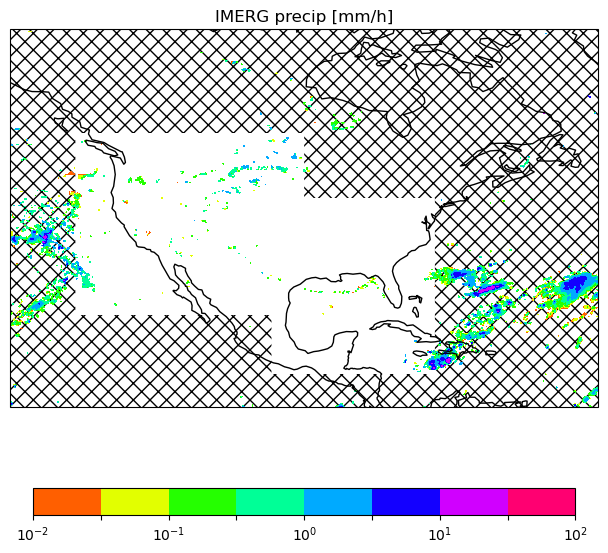

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(10,7), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([220, 310, 10, 60])#([220, 310, 10, 60])
#ax.imshow(mask1.T, transform=ccrs.PlateCarree())
ax.contourf(ds.lon, ds.lat, mastermask, levels=[0, 0.5, 1], hatches=['xx', ''], alpha=0)
cs = ax.contourf(ds.lon, ds.lat, ds.precipitation.isel(time=0).values.T, norm=mcolors.LogNorm(), levels=10.**np.arange(-2, 2.1, .5), cmap='hsv')
plt.colorbar(cs, orientation='horizontal', shrink=0.7)
plt.title('IMERG precip [mm/h]')
ax.coastlines()
plt.savefig('pretty_IMERG.png')

In [47]:
mastermask.sum()

<xarray.DataArray ()>
array(295574)

In [49]:
mastermask.to_netcdf('CMORPH_Harris_mask_orig.nc')